In [1]:
from portfolio_allocation import *
from Portfolio_allocation2 import *
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
# You can call these functions as follows:
tickers = ["MSFT", "AMZN", "KO", "MA", "COST", "LUV", "XOM", "PFE", "JPM", "UNH", "ACN", "DIS", "GILD", "TSLA","NVDA","AAPL","AMD","F","SOS","RGS"]


In [3]:
prices = download_data(tickers)
prices


[*********************100%***********************]  20 of 20 completed


,AAPL,ACN,AMD,AMZN,COST,DIS,F,GILD,JPM,KO,LUV,MA,MSFT,NVDA,PFE,RGS,SOS,TSLA,UNH,XOM
Date,,,,,,,,,,,,,,,,,,,,
1962-01-02,NaN,NaN,NaN,NaN,NaN,0.058398,NaN,NaN,NaN,0.048913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.097452
1962-01-03,NaN,NaN,NaN,NaN,NaN,0.059182,NaN,NaN,NaN,0.047823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.098899
1962-01-04,NaN,NaN,NaN,NaN,NaN,0.059182,NaN,NaN,NaN,0.048187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.099141
1962-01-05,NaN,NaN,NaN,NaN,NaN,0.059378,NaN,NaN,NaN,0.047097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.096970
1962-01-08,NaN,NaN,NaN,NaN,NaN,0.059182,NaN,NaN,NaN,0.046613,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.096728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-27,188.059998,300.809998,110.389999,129.179993,530.330017,89.059998,14.41,76.010002,139.199997,61.090000,35.250000,381.790009,334.570007,418.760010,36.419998,1.07,4.04,250.210007,482.559998,104.550003
2023-06-28,189.250000,301.720001,110.169998,129.039993,532.799988,88.830002,14.79,76.180000,138.589996,60.520000,35.470001,380.230011,335.850006,411.170013,36.290001,1.08,4.04,256.239990,474.450012,105.400002
2023-06-29,189.589996,308.329987,111.239998,127.900002,531.690002,88.949997,14.95,76.010002,143.429993,60.020000,35.950001,387.670013,335.049988,408.220001,36.119999,1.18,3.97,257.500000,476.440002,106.699997


In [4]:
prices.tail()

,AAPL,ACN,AMD,AMZN,COST,DIS,F,GILD,JPM,KO,LUV,MA,MSFT,NVDA,PFE,RGS,SOS,TSLA,UNH,XOM
Date,,,,,,,,,,,,,,,,,,,,
2023-06-27,188.059998,300.809998,110.389999,129.179993,530.330017,89.059998,14.41,76.010002,139.199997,61.090000,35.250000,381.790009,334.570007,418.760010,36.419998,1.07,4.04,250.210007,482.559998,104.550003
2023-06-28,189.250000,301.720001,110.169998,129.039993,532.799988,88.830002,14.79,76.180000,138.589996,60.520000,35.470001,380.230011,335.850006,411.170013,36.290001,1.08,4.04,256.239990,474.450012,105.400002
2023-06-29,189.589996,308.329987,111.239998,127.900002,531.690002,88.949997,14.95,76.010002,143.429993,60.020000,35.950001,387.670013,335.049988,408.220001,36.119999,1.18,3.97,257.500000,476.440002,106.699997
2023-06-30,193.970001,308.579987,113.910004,130.360001,538.380005,89.279999,15.13,77.070000,145.440002,60.220001,36.209999,393.299988,340.540009,423.019989,36.680000,1.11,4.15,261.769989,480.640015,107.250000
2023-07-03,192.460007,310.970001,115.820000,130.220001,541.039978,90.500000,15.24,76.714996,146.610001,60.580002,37.040001,393.959991,337.989990,424.130005,36.650002,1.11,4.20,279.820007,477.880005,107.459999


In [5]:
from pandas import DataFrame
from tabulate import  tabulate

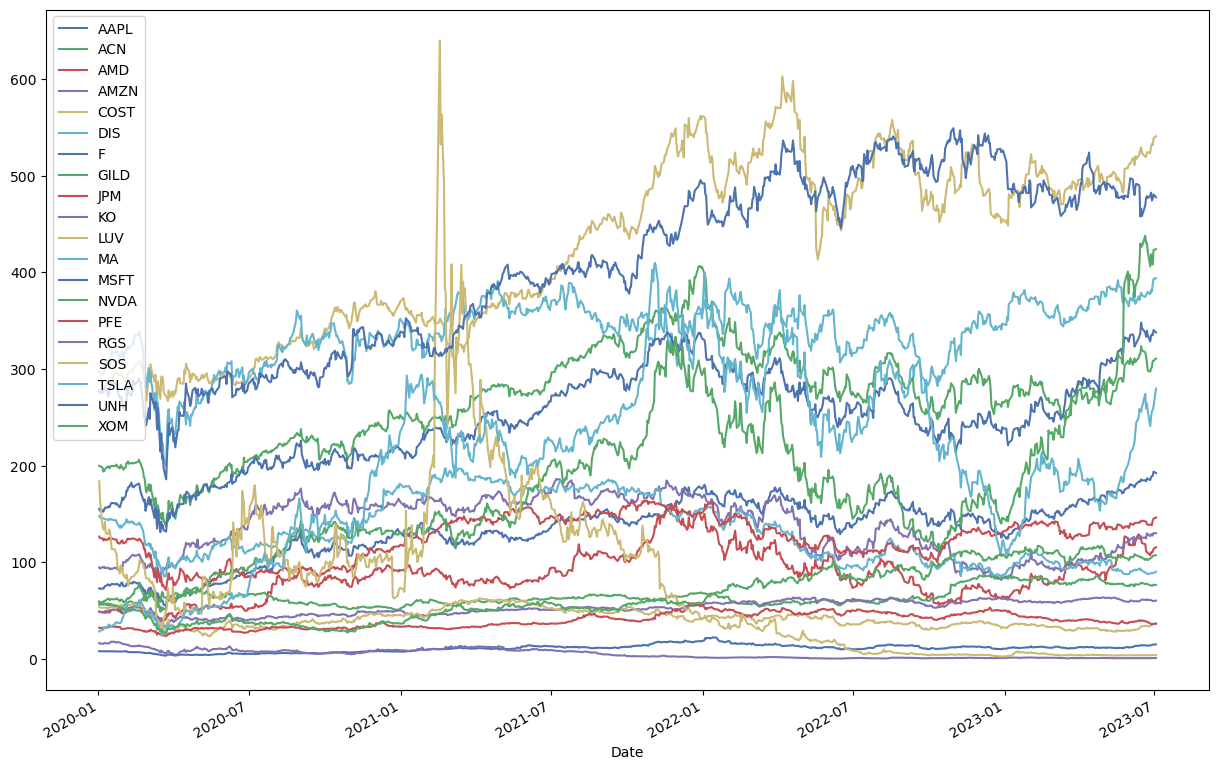

In [6]:
prices[prices.index >= "2020-01-01"].plot(figsize=(15,10));
plt.savefig("s4_1.png")


# Calculating the covariance matrix

In [8]:
covariance = calculate_covariance(prices)
covariance

,AAPL,ACN,AMD,AMZN,COST,DIS,F,GILD,JPM,KO,LUV,MA,MSFT,NVDA,PFE,RGS,SOS,TSLA,UNH,XOM
AAPL,0.199753,0.039033,0.090261,0.078715,0.038951,0.040536,0.044022,0.040908,0.046221,0.025138,0.036272,0.053340,0.063174,0.100122,0.026953,0.033276,0.065304,0.058011,0.033746,0.026147
ACN,0.039033,0.090606,0.060491,0.046989,0.028502,0.041521,0.044882,0.028590,0.048036,0.020512,0.037270,0.046212,0.042379,0.064782,0.025748,0.037462,0.055346,0.044633,0.029997,0.030058
AMD,0.090261,0.060491,0.353860,0.105092,0.043255,0.053796,0.068165,0.049525,0.062346,0.027480,0.055087,0.071765,0.073589,0.180195,0.033777,0.048773,0.118369,0.100125,0.036931,0.033060
AMZN,0.078715,0.046989,0.105092,0.326187,0.048028,0.056202,0.053738,0.056754,0.065222,0.020116,0.047748,0.056676,0.073152,0.105310,0.030824,0.038305,0.077409,0.066667,0.034046,0.026474
COST,0.038951,0.028502,0.043255,0.048028,0.100516,0.031911,0.031870,0.026765,0.038123,0.021269,0.031052,0.032237,0.037388,0.045590,0.025100,0.023126,0.021697,0.029541,0.027232,0.020216
DIS,0.040536,0.041521,0.053796,0.056202,0.031911,0.099737,0.041535,0.031858,0.047114,0.026019,0.039840,0.050617,0.043012,0.065357,0.029149,0.038208,0.065198,0.044163,0.031573,0.025718
F,0.044022,0.044882,0.068165,0.053738,0.031870,0.041535,0.127945,0.029858,0.054654,0.026180,0.047192,0.062004,0.041818,0.070588,0.026934,0.050657,0.095659,0.060310,0.028866,0.028228
GILD,0.040908,0.028590,0.049525,0.056754,0.026765,0.031858,0.029858,0.228971,0.041883,0.016698,0.030596,0.031736,0.034709,0.055096,0.032305,0.031322,-0.001251,0.031252,0.033506,0.020936
JPM,0.046221,0.048036,0.062346,0.065222,0.038123,0.047114,0.054654,0.041883,0.127063,0.027528,0.048865,0.067878,0.048728,0.074457,0.032431,0.051431,0.068122,0.041334,0.038130,0.033103
KO,0.025138,0.020512,0.027480,0.020116,0.021269,0.026019,0.026180,0.016698,0.027528,0.053200,0.022744,0.025824,0.027601,0.018334,0.025836,0.019327,0.009685,0.018337,0.022836,0.020523


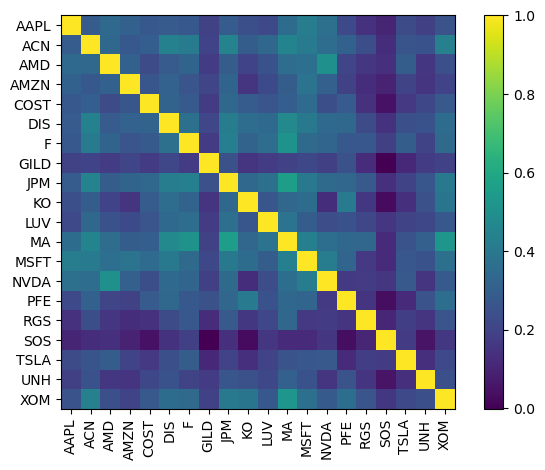

In [16]:
plotting.plot_covariance(covariance, plot_correlation=True);
plt.savefig("s4_2_2.png")

In [ ]:
S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()
plotting.plot_covariance(S, plot_correlation=True);
plt.savefig("s4_3.png")

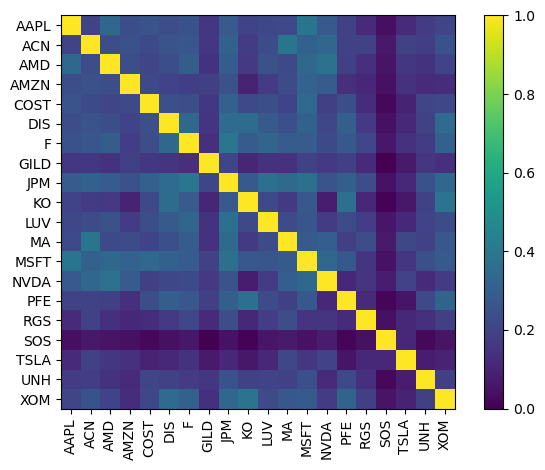

In [18]:
S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()
plotting.plot_covariance(S, plot_correlation=True);
plt.savefig("s4_3_2.png")

# Return estimation

In [25]:
from pypfopt import expected_returns

mu = expected_returns.capm_return(prices)
mu

AAPL    0.260611
ACN     0.197342
AMD     0.349962
AMZN    0.325453
COST    0.173439
DIS     0.203440
F       0.209965
GILD    0.214746
JPM     0.227296
KO      0.130440
LUV     0.204582
MA      0.242221
MSFT    0.227805
NVDA    0.381481
PFE     0.155416
RGS     0.225028
SOS     0.699897
TSLA    0.286453
UNH     0.186822
XOM     0.128829
Name: mkt, dtype: float64

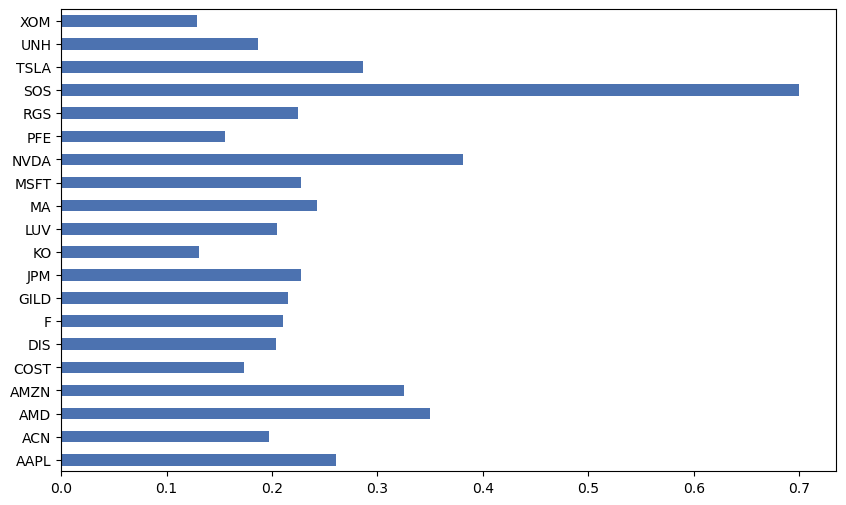

In [26]:
mu.plot.barh(figsize=(10,6));
plt.savefig("s4_4_2.png")

# Long/short min variance

In [20]:
weights, ef = portfolio_optimization(prices)

In [21]:
alloc, leftover = discrete_allocation(weights, prices, 20000)

/Users/surekaalmeida/opt/anaconda3/envs/env_zipline/lib/python3.8/site-packages/cvxpy/problems/problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/surekaalmeida/opt/anaconda3/envs/env_zipline/lib/python3.8/site-packages/cvxpy/problems/problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


In [22]:
weights

OrderedDict([('AAPL', 0.00291),
             ('ACN', 0.21823),
             ('AMD', -0.02401),
             ('AMZN', 0.0099),
             ('COST', 0.09786),
             ('DIS', -0.01797),
             ('F', -0.02003),
             ('GILD', 0.04959),
             ('JPM', -0.04254),
             ('KO', 0.12915),
             ('LUV', 0.02327),
             ('MA', 0.21991),
             ('MSFT', 0.00834),
             ('NVDA', -0.01418),
             ('PFE', 0.07015),
             ('RGS', 0.01744),
             ('SOS', 0.04854),
             ('TSLA', 0.11183),
             ('UNH', 0.03365),
             ('XOM', 0.07795)])

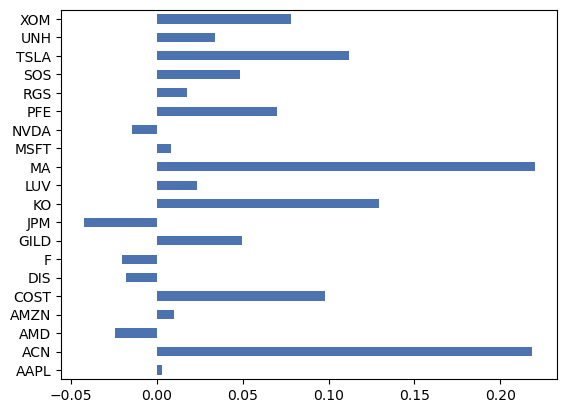

In [27]:
pd.Series(weights).plot.barh();
plt.savefig("s4_5_2.png")

In [28]:
ef.portfolio_performance(verbose=True);

Annual volatility: 12.0%


In [23]:
alloc

{'ACN': 13,
 'AMZN': 1,
 'COST': 3,
 'GILD': 12,
 'KO': 38,
 'LUV': 11,
 'MA': 10,
 'PFE': 34,
 'RGS': 283,
 'SOS': 207,
 'TSLA': 7,
 'UNH': 1,
 'XOM': 13,
 'DIS': -11,
 'F': -109,
 'JPM': -15,
 'NVDA': -2}

In [24]:
leftover


667.0899669684231

# Max Sharpe with sector constraints

In [30]:
sector_mapper = {
    "MSFT": "Tech",
    "AMZN": "Consumer Discretionary",
    "KO": "Consumer Staples",
    "MA": "Financial Services",
    "COST": "Consumer Staples",
    "LUV": "Aerospace",
    "XOM": "Energy",
    "PFE": "Healthcare",
    "JPM": "Financial Services",
    "UNH": "Healthcare",
    "ACN": "Misc",
    "DIS": "Media",
    "GILD": "Healthcare",
    "F": "Auto",
    "TSLA": "Auto",
    "NVDA": "Tech",
    "AAPL":"Tech",
    "AMD" :"Tech",
    "F" : "Consumer Durables",
    "SOS": "Technology services",
    "RGS" :"Consumer services"
}

sector_lower = {
    "Consumer Staples": 0.1, # at least 10% to staples
    "Tech": 0.05 # at least 5% to tech
    # For all other sectors, it will be assumed there is no lower bound
}

sector_upper = {
    "Tech": 0.2,
    "Aerospace":0.1,
    "Energy": 0.1,
    "Auto":0.15
}

In [31]:
mu = expected_returns.capm_return(prices)
S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()

ef = EfficientFrontier(mu, S)  # weight_bounds automatically set to (0, 1)
ef.add_sector_constraints(sector_mapper, sector_lower, sector_upper)

amzn_index = ef.tickers.index("AMZN")
ef.add_constraint(lambda w: w[amzn_index] == 0.10)

tsla_index = ef.tickers.index("TSLA")
ef.add_constraint(lambda w: w[tsla_index] <= 0.05)

ef.add_constraint(lambda w: w[10] >= 0.05)

ef.max_sharpe()
weights = ef.clean_weights()

In [32]:
weights

OrderedDict([('AAPL', 0.0042),
             ('ACN', 0.08089),
             ('AMD', 0.0),
             ('AMZN', 0.1),
             ('COST', 0.04671),
             ('DIS', 0.0),
             ('F', 0.0),
             ('GILD', 0.04127),
             ('JPM', 0.0),
             ('KO', 0.05329),
             ('LUV', 0.05),
             ('MA', 0.26029),
             ('MSFT', 0.0),
             ('NVDA', 0.05266),
             ('PFE', 0.00792),
             ('RGS', 0.0106),
             ('SOS', 0.22678),
             ('TSLA', 0.05),
             ('UNH', 0.01539),
             ('XOM', 0.0)])

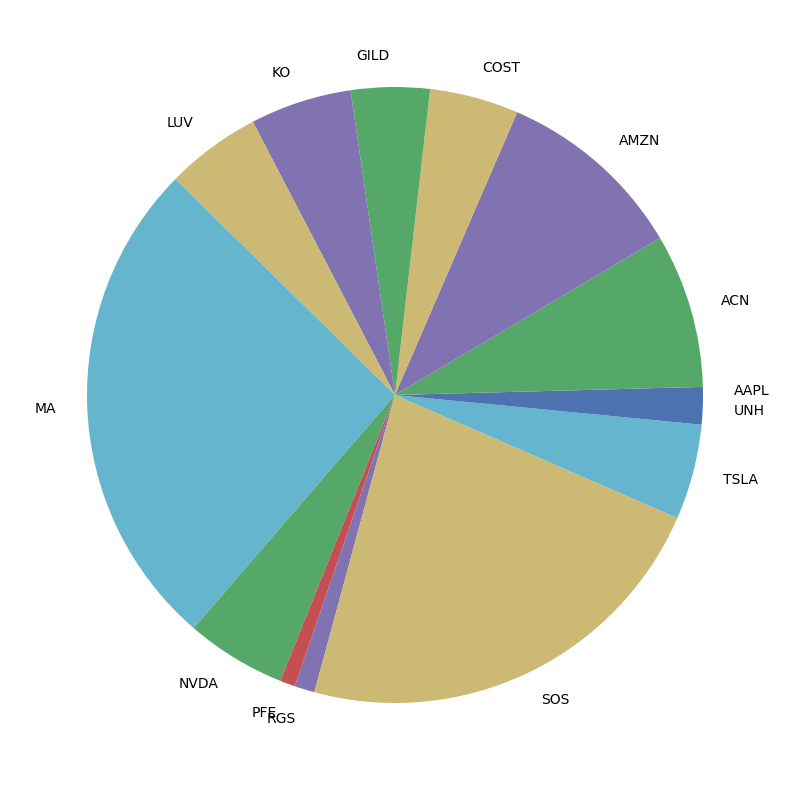

In [34]:
pd.Series(weights).plot.pie(figsize=(10,10));
plt.savefig("s4_6_2.png")

In [37]:
# O(N^2) loop not a good idea in a coding interview :)
for sector in set(sector_mapper.values()):
    total_weight = 0
    for t,w in weights.items():
        if sector_mapper[t] == sector:
            total_weight += w
    print(f"{sector}: {total_weight:.3f}")

Aerospace: 0.000
Healthcare: 0.091
Tech: 0.059
Consumer Discretionary: 0.050
Consumer Durables: 0.000
Financial Services: 0.251
Auto: 0.137
Energy: 0.000
Media: 0.000
Misc: 0.092
Technology services: 0.207
Consumer Staples: 0.100
Consumer services: 0.012


# Maximise return for a given risk, with L2 regularisation

In [38]:
ef = EfficientFrontier(mu, S)
ef.add_sector_constraints(sector_mapper, sector_lower, sector_upper)
ef.efficient_risk(target_volatility=0.15)
weights = ef.clean_weights()
weights

OrderedDict([('AAPL', 0.01064),
             ('ACN', 0.09217),
             ('AMD', 0.0),
             ('AMZN', 0.05032),
             ('COST', 0.05006),
             ('DIS', 0.0),
             ('F', 0.0),
             ('GILD', 0.0461),
             ('JPM', 0.0),
             ('KO', 0.04994),
             ('LUV', 0.0),
             ('MA', 0.25057),
             ('MSFT', 0.0),
             ('NVDA', 0.0487),
             ('PFE', 0.0237),
             ('RGS', 0.01211),
             ('SOS', 0.20736),
             ('TSLA', 0.13741),
             ('UNH', 0.02086),
             ('XOM', 0.0)])

In [39]:
num_small = len([k for k in weights if weights[k] <= 1e-4])
print(f"{num_small}/{len(ef.tickers)} tickers have zero weight")

7/20 tickers have zero weight


In [40]:
ef.portfolio_performance(verbose=True);

Expected annual return: 33.7%
Annual volatility: 15.0%
Sharpe Ratio: 2.11


In [41]:
from pypfopt import objective_functions

# You must always create a new efficient frontier object
ef = EfficientFrontier(mu, S)
ef.add_sector_constraints(sector_mapper, sector_lower, sector_upper)
ef.add_objective(objective_functions.L2_reg, gamma=0.1)  # gamma is the tuning parameter
ef.efficient_risk(0.15)
weights = ef.clean_weights()
weights

OrderedDict([('AAPL', 0.0152),
             ('ACN', 0.09335),
             ('AMD', 0.00282),
             ('AMZN', 0.05419),
             ('COST', 0.04992),
             ('DIS', 0.0),
             ('F', 0.0),
             ('GILD', 0.04809),
             ('JPM', 0.0),
             ('KO', 0.05008),
             ('LUV', 0.00928),
             ('MA', 0.18916),
             ('MSFT', 0.01208),
             ('NVDA', 0.05492),
             ('PFE', 0.03216),
             ('RGS', 0.02137),
             ('SOS', 0.20611),
             ('TSLA', 0.13335),
             ('UNH', 0.02791),
             ('XOM', 0.0)])

In [42]:
num_small = len([k for k in weights if weights[k] <= 1e-4])
print(f"{num_small}/{len(ef.tickers)} tickers have zero weight")

4/20 tickers have zero weight


In [43]:
ef = EfficientFrontier(mu, S)
ef.add_sector_constraints(sector_mapper, sector_lower, sector_upper)
ef.add_objective(objective_functions.L2_reg, gamma=1)  # gamma is the tuning parameter
ef.efficient_risk(0.15)
weights = ef.clean_weights()
weights

OrderedDict([('AAPL', 0.03236),
             ('ACN', 0.05987),
             ('AMD', 0.02504),
             ('AMZN', 0.05859),
             ('COST', 0.05245),
             ('DIS', 0.02454),
             ('F', 0.02008),
             ('GILD', 0.04771),
             ('JPM', 0.02628),
             ('KO', 0.04755),
             ('LUV', 0.03061),
             ('MA', 0.08053),
             ('MSFT', 0.03619),
             ('NVDA', 0.06348),
             ('PFE', 0.03583),
             ('RGS', 0.03961),
             ('SOS', 0.1699),
             ('TSLA', 0.08864),
             ('UNH', 0.03847),
             ('XOM', 0.02229)])

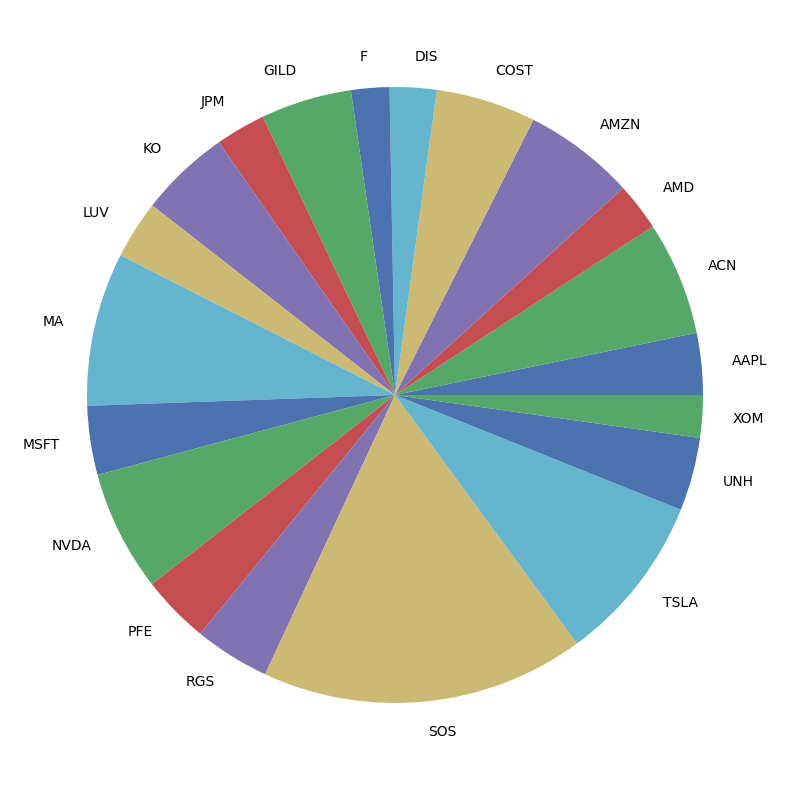

In [44]:
pd.Series(weights).plot.pie(figsize=(10, 10));
plt.savefig("s4_7_7.png")

In [45]:
ef.portfolio_performance(verbose=True);

Expected annual return: 31.6%
Annual volatility: 15.0%
Sharpe Ratio: 1.97


# Minimise risk for a given return, market-neutral

In [46]:
# Must have no weight bounds to allow shorts
ef = EfficientFrontier(mu, S, weight_bounds=(None, None))
ef.add_objective(objective_functions.L2_reg)
ef.efficient_return(target_return=0.07, market_neutral=True)
weights = ef.clean_weights()
weights

OrderedDict([('AAPL', 0.00277),
             ('ACN', -0.0143),
             ('AMD', 0.02301),
             ('AMZN', 0.01854),
             ('COST', -0.01936),
             ('DIS', -0.01047),
             ('F', -0.00941),
             ('GILD', -0.00804),
             ('JPM', -0.00451),
             ('KO', -0.02994),
             ('LUV', -0.01088),
             ('MA', -0.00189),
             ('MSFT', -0.00548),
             ('NVDA', 0.03165),
             ('PFE', -0.02311),
             ('RGS', -0.00565),
             ('SOS', 0.10464),
             ('TSLA', 0.00835),
             ('UNH', -0.01476),
             ('XOM', -0.03115)])

In [47]:
ef.portfolio_performance(verbose=True);

Expected annual return: 7.0%
Annual volatility: 5.5%
Sharpe Ratio: 0.91


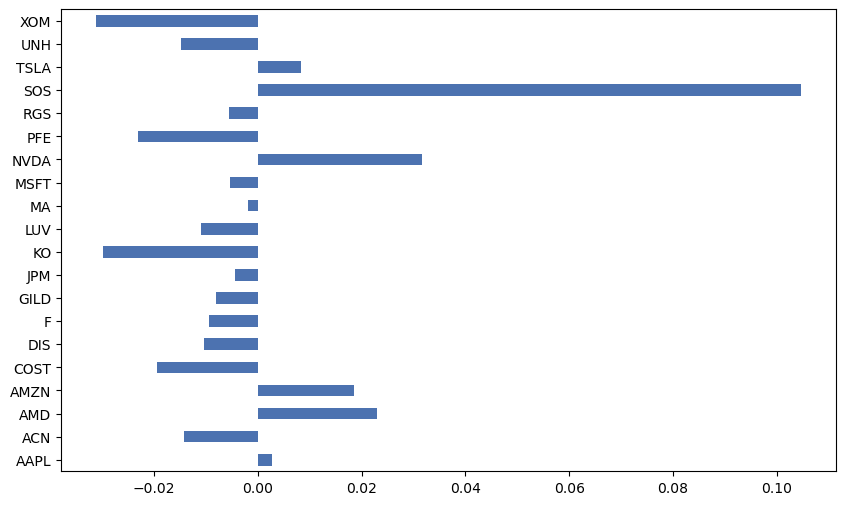

In [49]:
pd.Series(weights).plot.barh(figsize=(10,6));
plt.savefig("s4_8_8.png")

In [50]:
print(f"Net weight: {sum(weights.values()):.2f}")

Net weight: 0.00


# Efficient semi-variance optimization

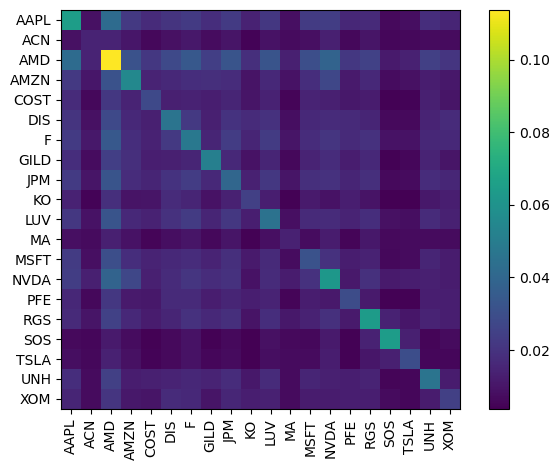

In [64]:
semicov = risk_models.semicovariance(prices, benchmark=0)
plotting.plot_covariance(semicov);
plt.savefig("s4_9.png")

In [65]:
ef = EfficientFrontier(mu, semicov)
ef.efficient_return(0.2)
weights = ef.clean_weights()
weights


OrderedDict([('AAPL', 0.0),
             ('ACN', 0.24518),
             ('AMD', 0.0),
             ('AMZN', 0.0),
             ('COST', 0.08426),
             ('DIS', 0.0),
             ('F', 0.0),
             ('GILD', 0.01698),
             ('JPM', 0.0),
             ('KO', 0.1458),
             ('LUV', 0.0),
             ('MA', 0.31299),
             ('MSFT', 0.0),
             ('NVDA', 0.0),
             ('PFE', 0.04876),
             ('RGS', 0.0),
             ('SOS', 0.03441),
             ('TSLA', 0.10009),
             ('UNH', 0.0028),
             ('XOM', 0.00873)])

In [66]:
ef.portfolio_performance(verbose=True);

Expected annual return: 20.0%
Annual volatility: 9.2%
Sharpe Ratio: 1.95


In [67]:
returns = expected_returns.returns_from_prices(prices)
returns = returns.dropna()

In [68]:
from pypfopt import EfficientSemivariance

es = EfficientSemivariance(mu, returns)
es.efficient_return(0.2)
es.portfolio_performance(verbose=True);


Expected annual return: 20.0%
Annual semi-deviation: 12.6%
Sortino Ratio: 1.42


In [69]:
es.weights = ef.weights
es.portfolio_performance(verbose=True);

Expected annual return: 20.0%
Annual semi-deviation: 16.2%
Sortino Ratio: 1.11


# Efficient CVaR optimization

In [70]:
returns = expected_returns.returns_from_prices(prices).dropna()
returns.head()

,AAPL,ACN,AMD,AMZN,COST,DIS,F,GILD,JPM,KO,LUV,MA,MSFT,NVDA,PFE,RGS,SOS,TSLA,UNH,XOM
Date,,,,,,,,,,,,,,,,,,,,
2017-05-01,0.020397,-0.000412,0.024060,0.025125,0.001915,-0.007526,-0.004359,-0.006418,0.000690,0.001622,0.001067,0.000430,0.013877,0.022435,-0.004127,0.001833,0.195312,0.027892,-0.001658,0.005022
2017-05-02,0.006344,-0.004701,-0.242291,-0.001360,0.004104,-0.003138,-0.043783,0.007047,-0.006432,0.003934,0.036425,0.015038,-0.001585,-0.029632,-0.005033,-0.005490,0.028758,-0.012205,-0.002578,-0.000122
2017-05-03,-0.003050,-0.003149,0.006783,-0.006241,0.006887,-0.024045,0.013736,-0.020119,0.005780,-0.001613,-0.002915,-0.006688,-0.003174,0.007441,-0.004165,-0.001840,0.000000,-0.024679,-0.009188,0.007922
2017-05-04,-0.003604,0.004322,-0.027911,-0.003719,0.014625,-0.004032,-0.006323,0.012945,0.001150,0.007849,0.003095,0.005028,-0.003909,-0.003837,-0.000597,-0.139171,-0.007624,-0.050029,0.008578,-0.012818
2017-05-05,0.016584,0.005794,0.008911,-0.003605,-0.012332,0.007376,0.012728,-0.004113,-0.001148,0.000687,0.001028,-0.003562,0.002761,0.000096,0.000897,-0.022484,-0.030730,0.043627,0.000575,0.004655


In [71]:
ef = EfficientFrontier(mu, S)
ef.max_sharpe()
weight_arr = ef.weights
ef.portfolio_performance(verbose=True);

Expected annual return: 32.0%
Annual volatility: 26.9%
Sharpe Ratio: 1.12


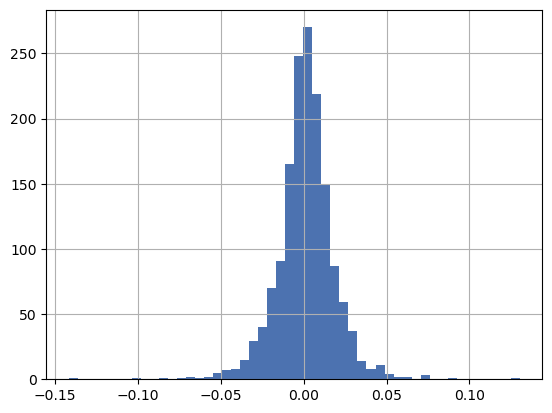

In [72]:
# Compute CVaR
portfolio_rets = (returns * weight_arr).sum(axis=1)
portfolio_rets.hist(bins=50);
plt.savefig("s4_10.png")

In [73]:
# VaR
var = portfolio_rets.quantile(0.05)
cvar = portfolio_rets[portfolio_rets <= var].mean()
print("VaR: {:.2f}%".format(100*var))
print("CVaR: {:.2f}%".format(100*cvar))

VaR: -2.65%
CVaR: -4.04%


In [74]:
from pypfopt import EfficientCVaR

ec = EfficientCVaR(mu, returns)
ec.min_cvar()
ec.portfolio_performance(verbose=True);

Expected annual return: 13.7%
Conditional Value at Risk: 2.48%


In [75]:
from pypfopt import EfficientCVaR

ec = EfficientCVaR(mu, returns)
ec.efficient_risk(target_cvar=0.025)
ec.portfolio_performance(verbose=True);

Expected annual return: 15.5%
Conditional Value at Risk: 2.50%


# Plotting - Unconstrained

In [76]:
from pypfopt import CLA, plotting

cla = CLA(mu, S)
cla.max_sharpe()
cla.portfolio_performance(verbose=True);

Expected annual return: 30.6%
Annual volatility: 25.7%
Sharpe Ratio: 1.11


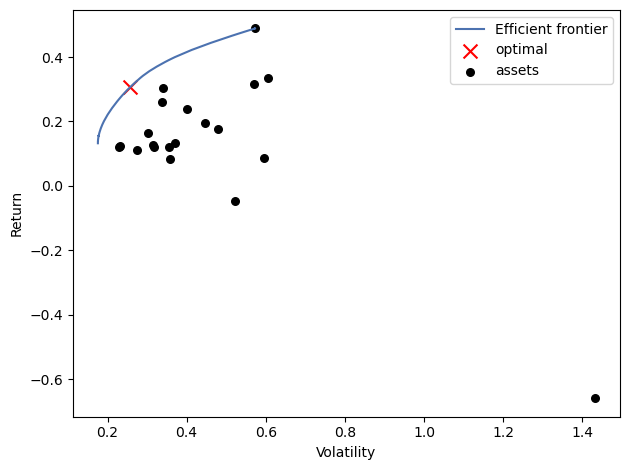

In [77]:
ax = plotting.plot_efficient_frontier(cla, showfig=False)
plt.savefig("s4_11.png")

# Plotting - Constrained

In [78]:
import cvxpy as cp

mu = expected_returns.capm_return(prices)
S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()

ef = EfficientFrontier(mu, S,)
big_tech_indices = [t in {"MSFT", "AMZN", "TSLA"} for t in tickers]
ef.add_constraint(lambda w: cp.sum(w[big_tech_indices]) <= 0.3)

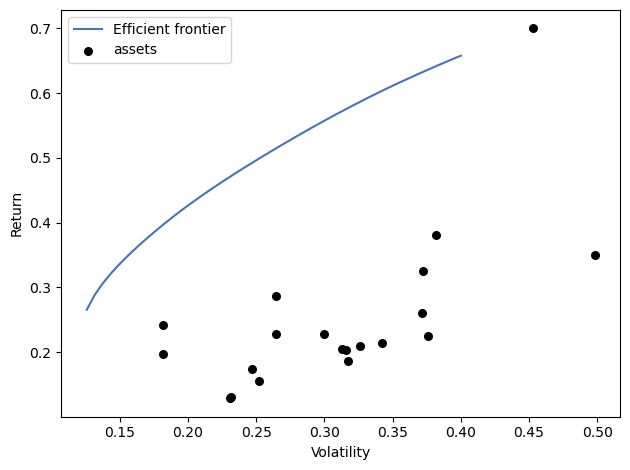

In [79]:
ax = plotting.plot_efficient_frontier(ef, ef_param="risk", 
                                      ef_param_range=np.linspace(0.12, 0.4, 50), 
                                      showfig=False);
plt.savefig("s4_12.png")

# Complex plots

In [80]:
n_samples = 10000
w = np.random.dirichlet(np.ones(len(mu)), n_samples)
rets = w.dot(mu)
stds = np.sqrt((w.T * (S @ w.T)).sum(axis=0))
sharpes = rets / stds

print("Sample portfolio returns:", rets)
print("Sample portfolio volatilities:", stds)

Sample portfolio returns: [0.23545183 0.22980377 0.21679412 ... 0.27888277 0.24733036 0.23547179]
Sample portfolio volatilities: 0       0.164468
1       0.142607
2       0.165082
3       0.162364
4       0.167998
          ...   
9995    0.138170
9996    0.158308
9997    0.162358
9998    0.166771
9999    0.163463
Length: 10000, dtype: float64


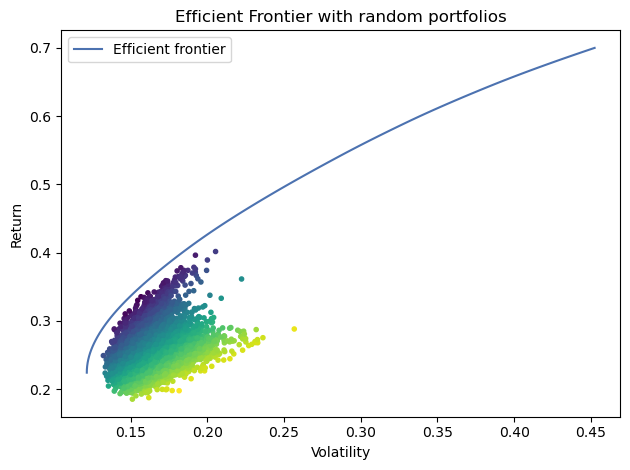

<Figure size 640x480 with 0 Axes>

In [81]:
# Plot efficient frontier with Monte Carlo sim
ef = EfficientFrontier(mu, S)

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Find and plot the tangency portfolio
ef2 = EfficientFrontier(mu, S)
ef2.max_sharpe()
ret_tangent, std_tangent, _ = ef2.portfolio_performance()

# Plot random portfolios
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Format
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.tight_layout()
plt.show()
plt.savefig("s4_13.png")